## India Crimes Analysis for 2023

In [23]:
#import packages
import pandas as pd
import numpy as np 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#load data
data = pd.read_csv("crime_dataset_india.csv")
data

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,None,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


##### This data set is detailed crime data from India in 2023. There are 40,160 observations and 14 columns. According to Global Organized Crime Index, India ranks *61nd out of 193 countries* in 2023 for crime.

In [25]:
data = data.iloc[:, :-3] #Drop last 3 columns because they are not necessary for analysis - dropped police deployed, case closed, date case closed

In [26]:
data.dtypes

Report Number          int64
Date Reported         object
Date of Occurrence    object
Time of Occurrence    object
City                  object
Crime Code             int64
Crime Description     object
Victim Age             int64
Victim Gender         object
Weapon Used           object
Crime Domain          object
dtype: object

In [35]:
data['Date Reported'] =data['Date Reported'].str[:10]
data['Date of Occurrence']= data['Date of Occurrence'].str[:10]
data['Time of Occurrence'] = data['Time of Occurrence'].str[-5:]
data

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain
0,1,02-01-2020,01-01-2020,01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime
1,2,01-01-2020,01-01-2020,06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime
2,3,02-01-2020,01-01-2020,14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime
3,4,01-01-2020,01-01-2020,14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime
4,5,01-01-2020,01-01-2020,16:51,Pune,421,VANDALISM,30,F,Other,Other Crime
...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024,07-31-2024,05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime
40156,40157,31-07-2024,07-31-2024,04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,None,Other Crime
40157,40158,02-08-2024,07-31-2024,21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime
40158,40159,01-08-2024,07-31-2024,11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime


### EDA (Exploratory Data Analysis)

Text(0.5, 1.0, 'Crime Count per City in India')

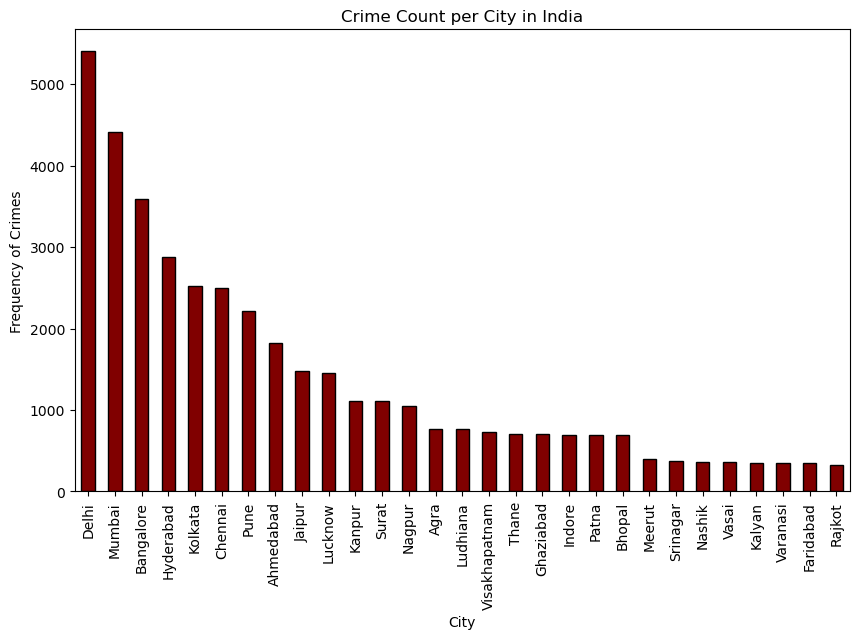

In [49]:
crime_count_per_city = data.groupby('City')['Crime Description'].count().sort_values(ascending=False)
crime_count_per_city.plot(kind='bar', figsize=(10, 6), color='maroon', edgecolor='black')
plt.xlabel('City')
plt.ylabel('Frequency of Crimes')
plt.title('Crime Count per City in India')


##### According to this bar graph, Delhi seems to have the most number of crimes overall. Mumbai is a close second. Rajkot, Gujarat seems to have least number of crimes.

In [62]:
top_5_cities = crime_count_per_city[:5].index.to_list() #Top 1 to 5
least_5_cities = crime_count_per_city[-5:].index.to_list()[::-1] # Least to greatest

['Rajkot', 'Faridabad', 'Varanasi', 'Kalyan', 'Vasai']

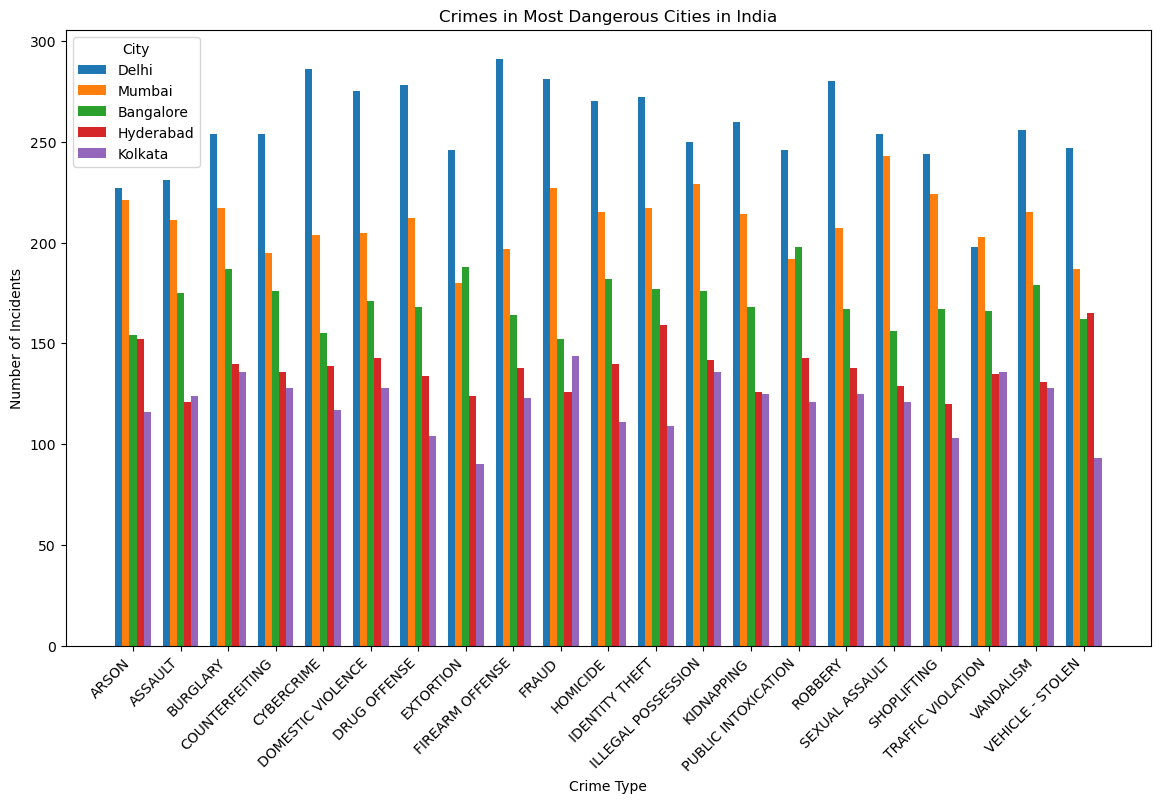

In [91]:
top_5_cities_data = data[data['City'].isin(top_5_cities)]

# Group by city and crime type, with counts of each type
cities_top = top_5_cities_data.groupby(['City', 'Crime Description']).size().unstack(fill_value=0)

# Set up the figure and bar width
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.15
index = np.arange(len(cities_top.columns))

# Plot bars for each city, side by side for each crime type
for i, city in enumerate(top_5_cities):
    if city in cities_top.index:
        counts = cities_top.loc[city]
        ax.bar(index + i * bar_width, counts, bar_width, label=city)

# Adding labels, title, and legend
plt.title('Crimes in Most Dangerous Cities in India')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(index + bar_width * (len(top_5_cities) - 1) / 2, cities_top.columns, rotation=45, ha='right')
plt.legend(title="City")

# Display the plot
plt.show()

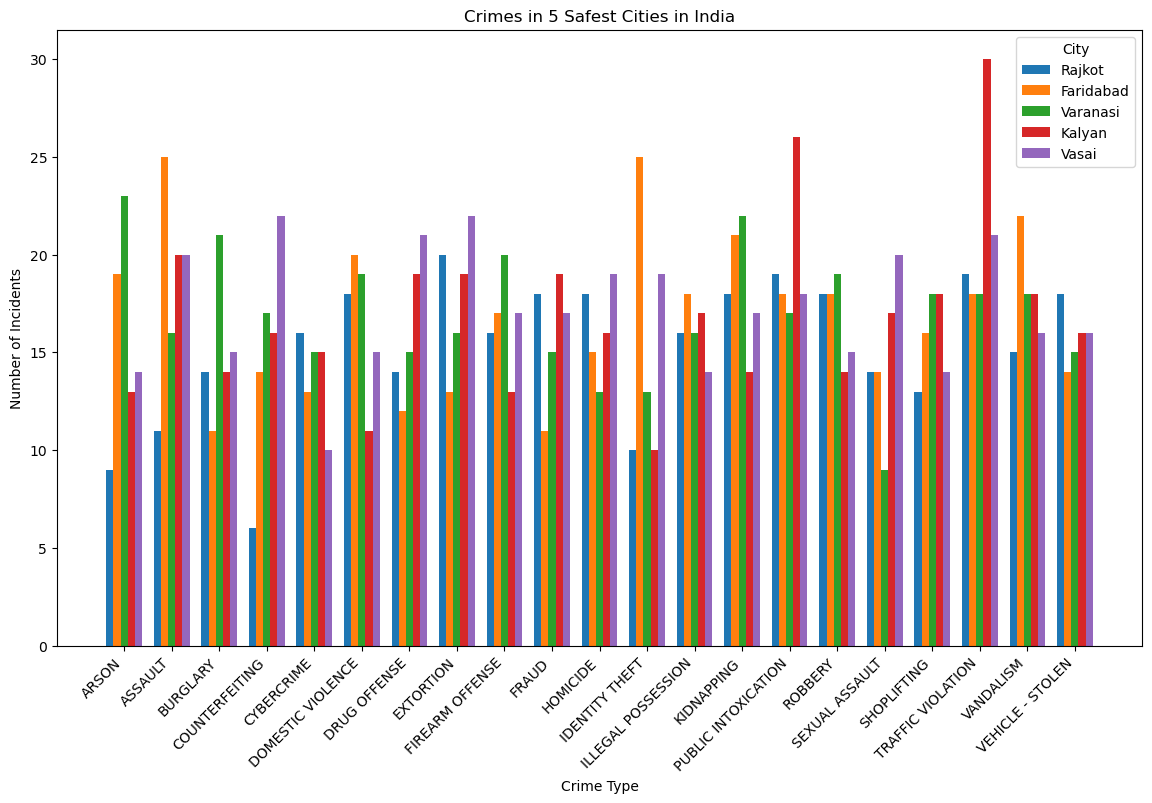

In [92]:
bottom_5_cities_data = data[data['City'].isin(least_5_cities)]

# Group by city and crime type, with counts of each type
cities_bottom = bottom_5_cities_data.groupby(['City', 'Crime Description']).size().unstack(fill_value=0)

# Set up the figure and bar width
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.15
index = np.arange(len(cities_bottom.columns))

# Plot bars for each city, side by side for each crime type
for i, city in enumerate(least_5_cities):
    if city in cities_bottom.index:
        counts = cities_bottom.loc[city]
        ax.bar(index + i * bar_width, counts, bar_width, label=city)

# Adding labels, title, and legend
plt.title('Crimes in 5 Safest Cities in India')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(index + bar_width * (len(least_5_cities) - 1) / 2, cities_bottom.columns, rotation=45, ha='right')
plt.legend(title="City")

# Display the plot
plt.show()

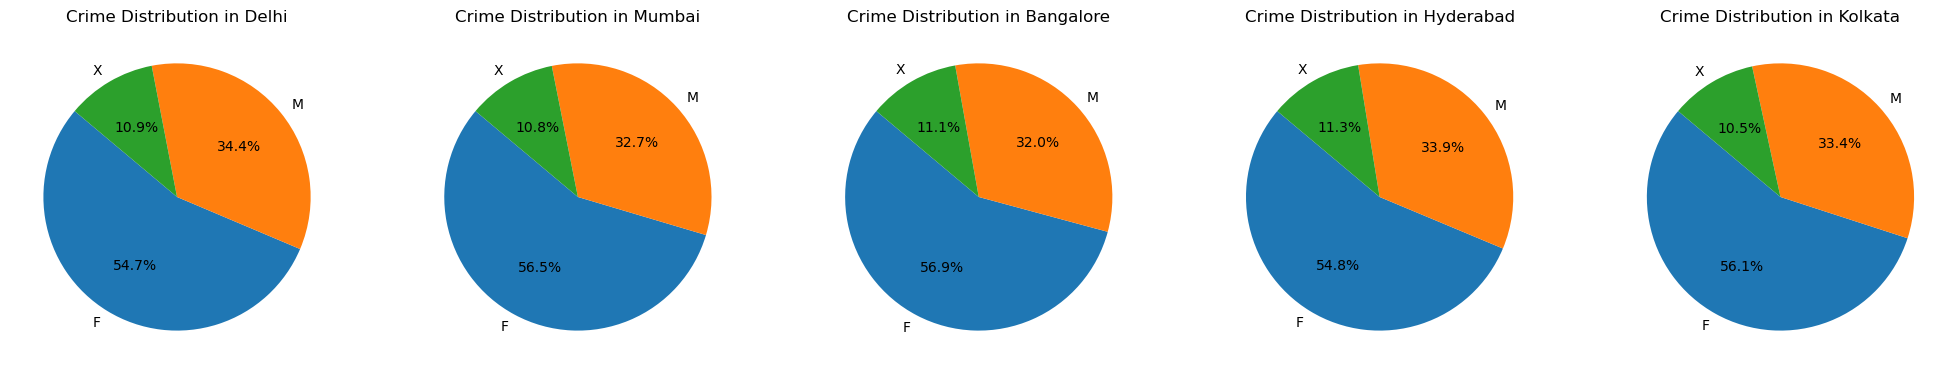

In [98]:
victim_gender_top = top_5_cities_data.groupby(['City', 'Victim Gender']).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(top_5_cities), figsize=(5 * len(top_5_cities), 6), squeeze=False)
for idx, city in enumerate(top_5_cities):
    if city in victim_gender_top.index:
        counts = victim_gender_top.loc[city]
        axes[0, idx].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        axes[0, idx].set_title(f'Crime Distribution in {city}')

## X relates to 3rd gender in India, aka. transgender or someone who is gender fluid


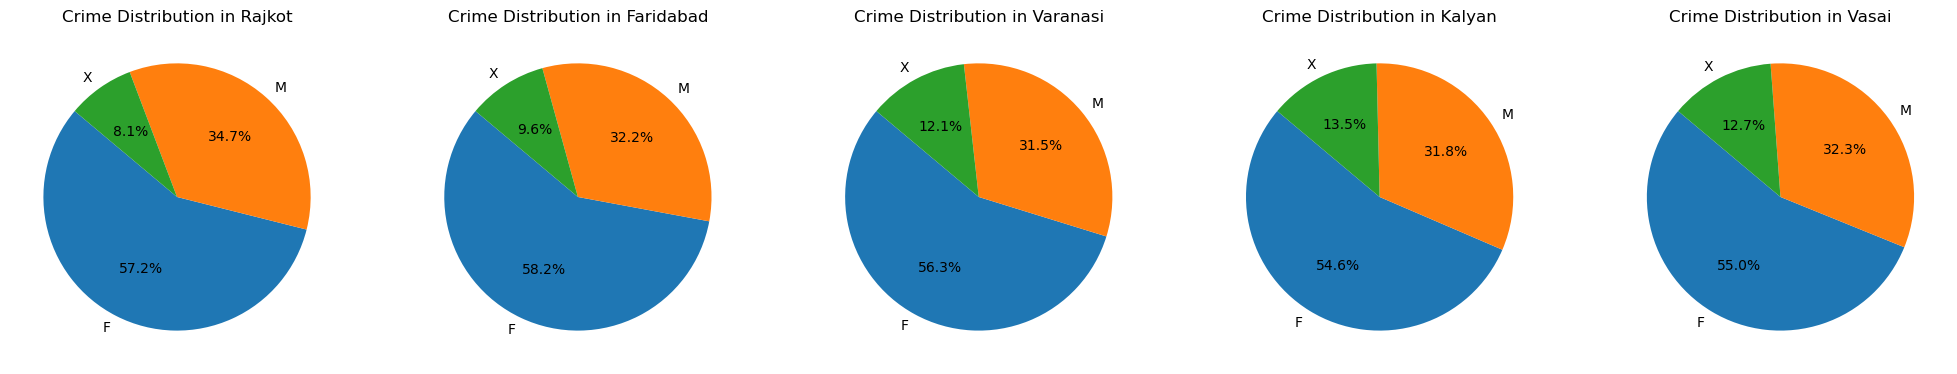

In [99]:
victim_gender_least = bottom_5_cities_data.groupby(['City', 'Victim Gender']).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(top_5_cities), figsize=(5 * len(top_5_cities), 6), squeeze=False)
for idx, city in enumerate(least_5_cities):
    if city in victim_gender_least.index:
        counts = victim_gender_least.loc[city]
        axes[0, idx].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        axes[0, idx].set_title(f'Crime Distribution in {city}')